In [54]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.neighbors import DistanceMetric
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
pd.set_option('display.max_rows', 60)
# pd.set_option('precision', 5)
pd.set_option('display.float_format', lambda x: "{:,.4f}".format(x))
pd.set_option('display.max_columns', 100)

In [2]:
agua = pd.read_csv("PRUEBA_TECNICA/datasets/sustancias_diversas.csv")
veneno = pd.read_csv("PRUEBA_TECNICA/datasets/veneno.csv")

In [3]:
agua['liquido'] = 'agua'
veneno['liquido'] = 'veneno'
veneno['id'] = 9999
veneno.drop('caracteristica',axis=1, inplace=True)

In [4]:
agua.describe()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10
count,500.0000,500.0000,500.0000,500.0000,500.0000,500.0000,500.0000,500.0000,500.0000,500.0000,500.0000
mean,487.3380,20.9778,55.9154,"2,122.9738",165.2312,"4,536.8582",1.0016,2.1076,3.7996,538.8052,23.6770
std,289.2347,1.6674,4.4832,165.0220,13.0699,354.1976,0.0866,0.1708,0.3150,41.9811,1.9769
min,1.0000,16.8000,45.0000,"1,705.7000",132.1000,"3,624.6000",0.8000,1.7000,3.0000,430.7000,19.0000
25%,233.7500,20.8000,55.4000,"2,111.0500",163.1000,"4,485.7750",1.0000,2.1000,3.8000,532.8750,23.5000
50%,469.5000,21.0000,55.9000,"2,129.8000",164.7500,"4,532.7500",1.0000,2.1000,3.8000,537.1000,23.7000
75%,745.2500,21.2000,56.5000,"2,147.6250",166.1250,"4,572.5500",1.0000,2.1000,3.8000,542.8000,23.9000
max,995.0000,25.2000,67.2000,"2,556.8000",197.5000,"5,430.0000",1.2000,2.5000,4.6000,644.3000,28.4000


In [5]:
agua.head(5)

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,liquido
0,517,24.7000,48.5000,"2,449.5000",133.0000,"5,044.5000",1.2000,2.2000,3.8000,568.8000,19.9000,agua
1,226,21.0000,56.2000,"2,114.7000",163.7000,"4,559.6000",1.0000,2.1000,3.8000,542.8000,23.7000,agua
2,615,18.2000,56.8000,"2,055.4000",150.3000,"4,718.8000",0.8000,2.4000,4.6000,431.6000,23.5000,agua
3,390,20.8000,56.0000,"2,112.9000",165.9000,"4,503.9000",1.0000,2.1000,3.8000,533.9000,23.9000,agua
4,172,21.0000,56.4000,"2,146.7000",166.0000,"4,492.2000",1.0000,2.1000,3.8000,543.2000,23.7000,agua


In [6]:
veneno = veneno[agua.columns]

In [7]:
veneno.head(10)

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,liquido
0,9999,21,56,"2,131.4000",164.6000,"4,527.9000",1,2.0900,3.8000,538,23.7000,veneno


In [8]:
df = pd.concat([agua,veneno], ignore_index=True)

In [9]:
df.head(2)

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,liquido
0,517,24.7000,48.5000,"2,449.5000",133.0000,"5,044.5000",1.2000,2.2000,3.8000,568.8000,19.9000,agua
1,226,21.0000,56.2000,"2,114.7000",163.7000,"4,559.6000",1.0000,2.1000,3.8000,542.8000,23.7000,agua


In [10]:
df.liquido.value_counts()

agua      500
veneno      1
Name: liquido, dtype: int64

id        0.0000
v1        0.0000
v2        0.0000
v3        0.0000
v4        0.0000
v5        0.0000
v6        0.0000
v7        0.0000
v8        0.0000
v9        0.0000
v10       0.0000
liquido   0.0000
dtype: float64

'duplicates: '

False

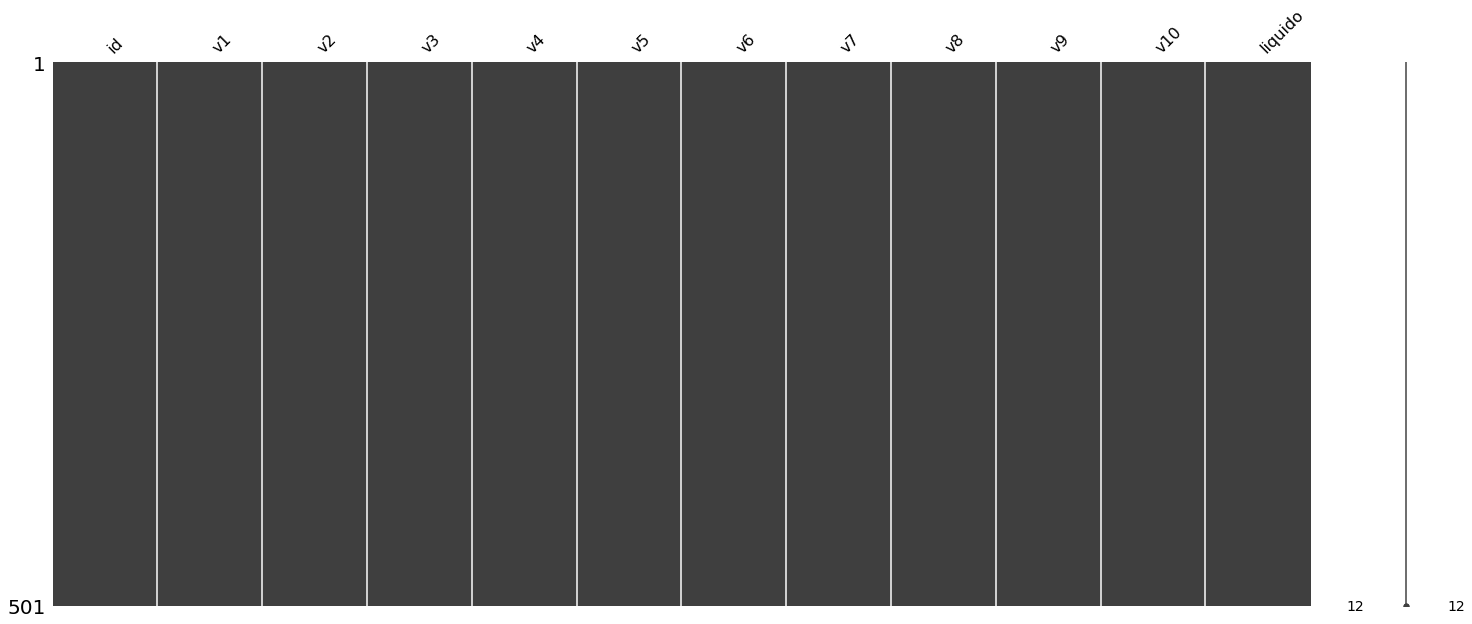

In [11]:
msno.matrix(df)
display(round(df.isnull().sum()/df.shape[0],3))
display('duplicates: ',any(df.duplicated()))

In [12]:
df.reset_index(drop=True, inplace=True)

In [13]:
cols = [x for x in df.columns if x not in ['id','liquido']]

In [28]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(df[cols]),columns=cols)
X.head(2)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10
0,0.9405,0.1577,0.8739,0.0138,0.7865,1.0000,0.6250,0.5000,0.6465,0.0957
1,0.5000,0.5045,0.4806,0.4832,0.5179,0.5000,0.5000,0.5000,0.5248,0.5000


In [29]:
X = X.join(df[['id','liquido']])
X.head(2)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,id,liquido
0,0.9405,0.1577,0.8739,0.0138,0.7865,1.0000,0.6250,0.5000,0.6465,0.0957,517,agua
1,0.5000,0.5045,0.4806,0.4832,0.5179,0.5000,0.5000,0.5000,0.5248,0.5000,226,agua


In [30]:
dist = DistanceMetric.get_metric('euclidean')
distance = pd.DataFrame(dist.pairwise(X[cols]))

In [31]:
distance['id'] = X['id'].copy()

In [38]:
distance.set_index('id', inplace=True)

In [42]:
distance.columns = distance.index.tolist()

In [43]:
distance

,517,226,615,390,172,225,822,199,329,52,818,419,534,442,775,123,858,147,788,719,785,93,446,821,72,443,116,137,331,531,911,924,951,718,541,340,584,204,525,342,526,153,805,167,518,89,436,210,270,752,...,307,280,863,48,34,568,378,586,262,700,616,868,20,19,90,598,536,783,829,373,462,760,284,604,916,345,244,748,25,22,975,439,405,846,515,288,65,358,898,129,427,99,193,701,699,579,338,660,522,9999
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
517,0.0000,1.0979,1.7109,1.1412,1.1130,1.1332,1.1950,1.0967,1.0765,1.0911,1.1319,1.1070,1.5197,1.1066,1.4303,1.0846,0.8517,1.0895,0.9435,1.0703,1.2902,1.1014,1.1120,1.6556,1.1008,1.1049,1.0994,1.1261,1.0970,1.3736,1.3004,2.1440,1.8434,1.5669,1.3135,1.1009,1.3385,1.0994,1.3413,1.1074,0.9110,1.1306,1.3739,1.1143,1.3192,1.1106,1.1076,1.1007,1.1160,0.9859,...,1.1118,1.0777,1.7401,1.0972,1.1066,1.1988,1.0953,1.7607,1.1069,1.0437,1.3976,1.1987,1.1245,1.1041,1.1060,1.7749,1.0924,1.3942,1.4428,1.1127,1.1154,1.3750,1.1147,1.5710,1.3967,1.0848,1.0780,1.4255,1.0883,1.0712,0.9522,1.0868,1.1104,1.4891,1.6638,1.0994,1.1050,1.0905,1.6643,1.1152,1.1114,1.0847,1.1115,1.5495,1.0191,1.5883,1.1181,1.5531,1.3753,1.1029
226,1.0979,0.0000,1.0385,0.0702,0.0643,0.0691,0.6124,0.0681,0.0642,0.0551,0.8474,0.0391,1.0747,0.0557,0.9144,0.0408,0.8270,0.0580,0.8417,0.9331,0.9007,0.0651,0.0664,1.0722,0.0424,0.0555,0.0630,0.0633,0.0550,0.7976,1.0389,1.2398,1.0042,0.8969,0.7823,0.0469,0.8078,0.0553,0.7850,0.0728,0.7261,0.0660,1.1337,0.0458,0.9251,0.0559,0.0534,0.0295,0.0590,0.8899,...,0.0550,0.0452,0.8279,0.0576,0.0478,0.9181,0.0474,1.0139,0.0612,0.8457,1.0034,1.0445,0.0586,0.0584,0.0595,1.2403,0.8827,0.8923,0.9550,0.0409,0.0626,0.9681,0.0718,0.8595,0.8425,0.0525,0.0551,0.9311,0.0494,0.0554,0.5962,0.0381,0.0829,1.1342,0.8298,0.0398,0.0276,0.0605,1.1116,0.0629,0.0466,0.0535,0.0629,0.9074,1.0324,0.7449,0.0438,0.7976,1.1016,0.0403
615,1.7109,1.0385,0.0000,1.0220,1.0537,1.0180,0.7257,1.0445,1.0289,1.0431,1.3276,1.0348,1.4812,1.0311,1.6257,1.0401,1.4711,1.0145,1.4864,1.2383,1.5464,1.0318,1.0492,1.7768,1.0434,1.0238,1.0216,1.0209,1.0463,1.2993,1.7204,1.3425,1.1377,1.6528,1.6901,1.0352,1.5387,1.0262,1.3407,1.0287,1.5053,1.0168,1.1494,1.0470,1.7876,1.0193,1.0280,1.0307,1.0370,1.5224,...,1.0383,1.0488,1.1414,1.0383,1.0317,1.0906,1.0494,1.4068,1.0155,1.2380,1.5914,1.4626,1.0340,1.0315,1.0295,1.1060,1.3202,1.3113,0.8440,1.0318,1.0347,1.4622,1.0327,0.8774,1.6222,1.0327,1.0310,1.4485,1.0491,1.0277,1.1638,1.0345,1.0386,1.2256,1.2766,1.0239,1.0380,1.0230,1.3959,1.0307,1.0302,1.0215,1.0221,1.1025,1.3588,1.2627,1.0283,1.0313,1.8580,1.0383
390,1.1412,0.0702,1.0220,0.0000,0.0697,0.0402,0.6115,0.0638,0.0757,0.0727,0.8697,0.0462,1.0961,0.0536,0.9261,0.0687,0.8701,0.0692,0.8797,0.9378,0.9074,0.0714,0.0633,1.0465,0.0677,0.0606,0.0639,0.0292,0.0752,0.8060,1.0524,1.2024,0.9678,0.8795,0.8189,0.0716,0.8086,0.0639,0.7698,0.0494,0.7364,0.0289,1.1375,0.0500,0.9500,0.0478,0.0409,0.0693,0.0474,0.9290,...,0.0511,0.0828,0.8000,0.0630,0.0559,0.9119,0.0665,1.0052,0.0525,0.8711,1.0202,1.0509,0.0473,0.0599,0.0519,1.2453,0.9217,0.8807,0.9692,0.0477,0.0605,0.9927,0.0510,0.8420,0.8339,0.0696,0.0781,0.9634,0.0705,0.0806,0.6188,0.0807,0.0641,1.1694,0.7843,0.0643,0.0589,0.0621,1.1012,0.0577,0.0569,0.0702,0.0599,0.8893,1.0536,0.6975,0.0345,0.7674,1.1149,0.0509
172,1.1130,0.0643,1.0537,0.0697,0.0000,0.0656,0.6328,0.0579,0.0717,0.0565,0.8306,0.0506,1.0972,0.0628,0.9236,0.0622,0.8535,0.0843,0.8564,0.9335,0.8788,0.0518,0.0221,1.0586,0.0495,0.0643,0.0602,0.0668,0.0497,0.7757,1.0648,1.2285,0.9838,0.8863,0.7939,0.0532,0.7826,0.0574,0.8018,0.0621,0.7300,0.0636,1.1255,0.0525,0.9445,0.0607,0.0612,0.0731,0.0283,0.8921,...,0.0469,0.0678,0.8201,0.0539,0.0606,0.9132,0.0459,1.0053,0.0794,0.8753,0.9837,1.0843,0.0414,0.0528,0.0568,1.2484,0.9068,0.8974,0.9854,0.0575,0.0582,0.9786,0.0581,0.8690,0.8124,0.0532,0.0666,0.9739,0.0529,0.0791,0.6275,0.0632,0.0501,1.1385,0.8057,0.0652,0.0567,0.0803,1.1310,0.0723,0.0599,0.0760,0.0622,0.9081,1.031

In [60]:
distance.loc[distance.index!=9999,9999].sort_values().head(50).index

Int64Index([469,  55, 287, 419, 166, 338, 481,  38,  17,  40, 205, 376, 208,
            345, 436, 109, 222, 311,  84,   4,  75, 283, 187, 270,  65, 373,
            374, 123, 321,  46, 392,  67, 266, 440, 275, 474, 120,  83, 211,
            464, 295,  89,  19, 430, 363, 102, 335, 269,  98, 159],
           dtype='int64', name='id')

In [55]:
# Save 1
with open('distance.sav', 'wb') as f:
	pickle.dump(distance, f)
# Load 1
with open('distance.sav', 'rb') as f:
	distance = pickle.load(f)

In [56]:
distance

,517,226,615,390,172,225,822,199,329,52,818,419,534,442,775,123,858,147,788,719,785,93,446,821,72,443,116,137,331,531,911,924,951,718,541,340,584,204,525,342,526,153,805,167,518,89,436,210,270,752,...,307,280,863,48,34,568,378,586,262,700,616,868,20,19,90,598,536,783,829,373,462,760,284,604,916,345,244,748,25,22,975,439,405,846,515,288,65,358,898,129,427,99,193,701,699,579,338,660,522,9999
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
517,0.0000,1.0979,1.7109,1.1412,1.1130,1.1332,1.1950,1.0967,1.0765,1.0911,1.1319,1.1070,1.5197,1.1066,1.4303,1.0846,0.8517,1.0895,0.9435,1.0703,1.2902,1.1014,1.1120,1.6556,1.1008,1.1049,1.0994,1.1261,1.0970,1.3736,1.3004,2.1440,1.8434,1.5669,1.3135,1.1009,1.3385,1.0994,1.3413,1.1074,0.9110,1.1306,1.3739,1.1143,1.3192,1.1106,1.1076,1.1007,1.1160,0.9859,...,1.1118,1.0777,1.7401,1.0972,1.1066,1.1988,1.0953,1.7607,1.1069,1.0437,1.3976,1.1987,1.1245,1.1041,1.1060,1.7749,1.0924,1.3942,1.4428,1.1127,1.1154,1.3750,1.1147,1.5710,1.3967,1.0848,1.0780,1.4255,1.0883,1.0712,0.9522,1.0868,1.1104,1.4891,1.6638,1.0994,1.1050,1.0905,1.6643,1.1152,1.1114,1.0847,1.1115,1.5495,1.0191,1.5883,1.1181,1.5531,1.3753,1.1029
226,1.0979,0.0000,1.0385,0.0702,0.0643,0.0691,0.6124,0.0681,0.0642,0.0551,0.8474,0.0391,1.0747,0.0557,0.9144,0.0408,0.8270,0.0580,0.8417,0.9331,0.9007,0.0651,0.0664,1.0722,0.0424,0.0555,0.0630,0.0633,0.0550,0.7976,1.0389,1.2398,1.0042,0.8969,0.7823,0.0469,0.8078,0.0553,0.7850,0.0728,0.7261,0.0660,1.1337,0.0458,0.9251,0.0559,0.0534,0.0295,0.0590,0.8899,...,0.0550,0.0452,0.8279,0.0576,0.0478,0.9181,0.0474,1.0139,0.0612,0.8457,1.0034,1.0445,0.0586,0.0584,0.0595,1.2403,0.8827,0.8923,0.9550,0.0409,0.0626,0.9681,0.0718,0.8595,0.8425,0.0525,0.0551,0.9311,0.0494,0.0554,0.5962,0.0381,0.0829,1.1342,0.8298,0.0398,0.0276,0.0605,1.1116,0.0629,0.0466,0.0535,0.0629,0.9074,1.0324,0.7449,0.0438,0.7976,1.1016,0.0403
615,1.7109,1.0385,0.0000,1.0220,1.0537,1.0180,0.7257,1.0445,1.0289,1.0431,1.3276,1.0348,1.4812,1.0311,1.6257,1.0401,1.4711,1.0145,1.4864,1.2383,1.5464,1.0318,1.0492,1.7768,1.0434,1.0238,1.0216,1.0209,1.0463,1.2993,1.7204,1.3425,1.1377,1.6528,1.6901,1.0352,1.5387,1.0262,1.3407,1.0287,1.5053,1.0168,1.1494,1.0470,1.7876,1.0193,1.0280,1.0307,1.0370,1.5224,...,1.0383,1.0488,1.1414,1.0383,1.0317,1.0906,1.0494,1.4068,1.0155,1.2380,1.5914,1.4626,1.0340,1.0315,1.0295,1.1060,1.3202,1.3113,0.8440,1.0318,1.0347,1.4622,1.0327,0.8774,1.6222,1.0327,1.0310,1.4485,1.0491,1.0277,1.1638,1.0345,1.0386,1.2256,1.2766,1.0239,1.0380,1.0230,1.3959,1.0307,1.0302,1.0215,1.0221,1.1025,1.3588,1.2627,1.0283,1.0313,1.8580,1.0383
390,1.1412,0.0702,1.0220,0.0000,0.0697,0.0402,0.6115,0.0638,0.0757,0.0727,0.8697,0.0462,1.0961,0.0536,0.9261,0.0687,0.8701,0.0692,0.8797,0.9378,0.9074,0.0714,0.0633,1.0465,0.0677,0.0606,0.0639,0.0292,0.0752,0.8060,1.0524,1.2024,0.9678,0.8795,0.8189,0.0716,0.8086,0.0639,0.7698,0.0494,0.7364,0.0289,1.1375,0.0500,0.9500,0.0478,0.0409,0.0693,0.0474,0.9290,...,0.0511,0.0828,0.8000,0.0630,0.0559,0.9119,0.0665,1.0052,0.0525,0.8711,1.0202,1.0509,0.0473,0.0599,0.0519,1.2453,0.9217,0.8807,0.9692,0.0477,0.0605,0.9927,0.0510,0.8420,0.8339,0.0696,0.0781,0.9634,0.0705,0.0806,0.6188,0.0807,0.0641,1.1694,0.7843,0.0643,0.0589,0.0621,1.1012,0.0577,0.0569,0.0702,0.0599,0.8893,1.0536,0.6975,0.0345,0.7674,1.1149,0.0509
172,1.1130,0.0643,1.0537,0.0697,0.0000,0.0656,0.6328,0.0579,0.0717,0.0565,0.8306,0.0506,1.0972,0.0628,0.9236,0.0622,0.8535,0.0843,0.8564,0.9335,0.8788,0.0518,0.0221,1.0586,0.0495,0.0643,0.0602,0.0668,0.0497,0.7757,1.0648,1.2285,0.9838,0.8863,0.7939,0.0532,0.7826,0.0574,0.8018,0.0621,0.7300,0.0636,1.1255,0.0525,0.9445,0.0607,0.0612,0.0731,0.0283,0.8921,...,0.0469,0.0678,0.8201,0.0539,0.0606,0.9132,0.0459,1.0053,0.0794,0.8753,0.9837,1.0843,0.0414,0.0528,0.0568,1.2484,0.9068,0.8974,0.9854,0.0575,0.0582,0.9786,0.0581,0.8690,0.8124,0.0532,0.0666,0.9739,0.0529,0.0791,0.6275,0.0632,0.0501,1.1385,0.8057,0.0652,0.0567,0.0803,1.1310,0.0723,0.0599,0.0760,0.0622,0.9081,1.031

In [57]:
s = pd.Series(distance.loc[distance.index!=9999,9999].sort_values().head(50).index)
s

0     469
1      55
2     287
3     419
4     166
5     338
6     481
7      38
8      17
9      40
10    205
11    376
12    208
13    345
14    436
15    109
16    222
17    311
18     84
19      4
20     75
21    283
22    187
23    270
24     65
25    373
26    374
27    123
28    321
29     46
30    392
31     67
32    266
33    440
34    275
35    474
36    120
37     83
38    211
39    464
40    295
41     89
42     19
43    430
44    363
45    102
46    335
47    269
48     98
49    159
Name: id, dtype: int64

In [58]:
s.to_csv("urgente_orden_de_cierre.csv", index=False)